# HW 4

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.special as sp
import math

In [6]:
def f(z):
    baryon_photon_ratio = 6e-10
    T_0 = 2.73
    m_e = .511
    E_I = 13.6

    part1 = 2 * sp.zeta(3) * (math.pi)**-2 * baryon_photon_ratio
    part2 = ((2 * math.pi * T_0 * (1+z))/m_e)**(3/2)
    part3 = np.exp(E_I/(T_0*(1+z)))

    return part1*part2*part3

def X_e(z):
    numerator = -1 + np.sqrt(1 + 4*f(z))
    denominator = 2*f(z)
    return numerator/denominator

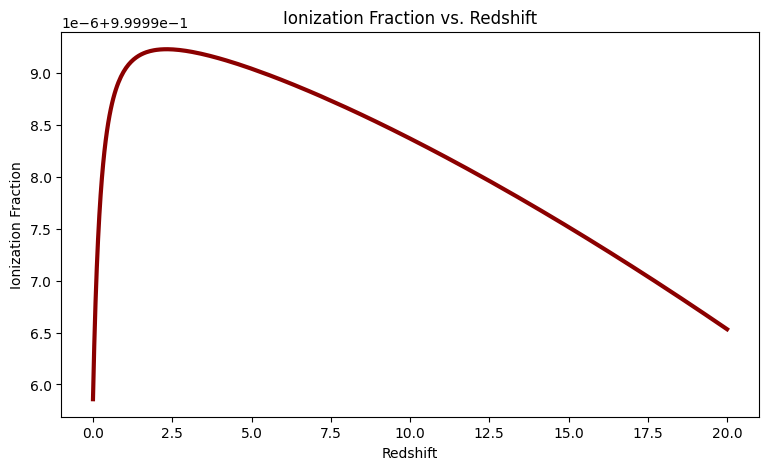

In [19]:
zs = np.linspace(0,20,500)

fig,ax = plt.subplots(figsize = (9,5))

ax.set_title('Ionization Fraction vs. Redshift')
ax.set_ylabel('Ionization Fraction')
ax.set_xlabel("Redshift")

ax.plot(zs, X_e(zs), color='darkred', linewidth=3)

plt.show()